In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# 解决matplotlib显示中文问题
# 仅适用于Windows
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

inputFile = '../data/pokemon.csv'
data = pd.read_csv(inputFile)
data.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
Number              721 non-null int64
Name                721 non-null object
Type_1              721 non-null object
Type_2              350 non-null object
Total               721 non-null int64
HP                  721 non-null int64
Attack              721 non-null int64
Defense             721 non-null int64
Sp_Atk              721 non-null int64
Sp_Def              721 non-null int64
Speed               721 non-null int64
Generation          721 non-null int64
isLegendary         721 non-null bool
Color               721 non-null object
hasGender           721 non-null bool
Pr_Male             644 non-null float64
Egg_Group_1         721 non-null object
Egg_Group_2         191 non-null object
hasMegaEvolution    721 non-null bool
Height_m            721 non-null float64
Weight_kg           721 non-null float64
Catch_Rate          721 non-null int64
Body_Style          721 non-

## 单变量分析

<IPython.core.display.Javascript object>


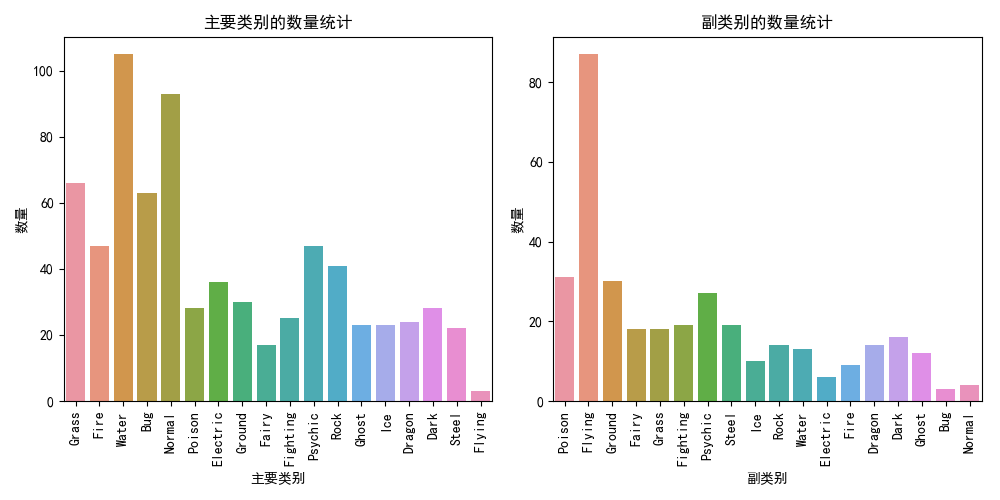

In [18]:
plt.figure(figsize=(10, 5))

# Type_1 数量统计图
plt.subplot(1, 2, 1)
sns.countplot(x='Type_1', data=data)

plt.title('主要类别的数量统计')
plt.xticks(rotation='vertical')
plt.xlabel('主要类别')
plt.ylabel('数量')

# Type_2 数量统计图
plt.subplot(1, 2, 2)
sns.countplot(x='Type_2', data=data)

plt.title('副类别的数量统计')
plt.xlabel('副类别')
plt.ylabel('数量')
plt.xticks(rotation='vertical')

plt.tight_layout()  # 紧凑的显示图表

<IPython.core.display.Javascript object>


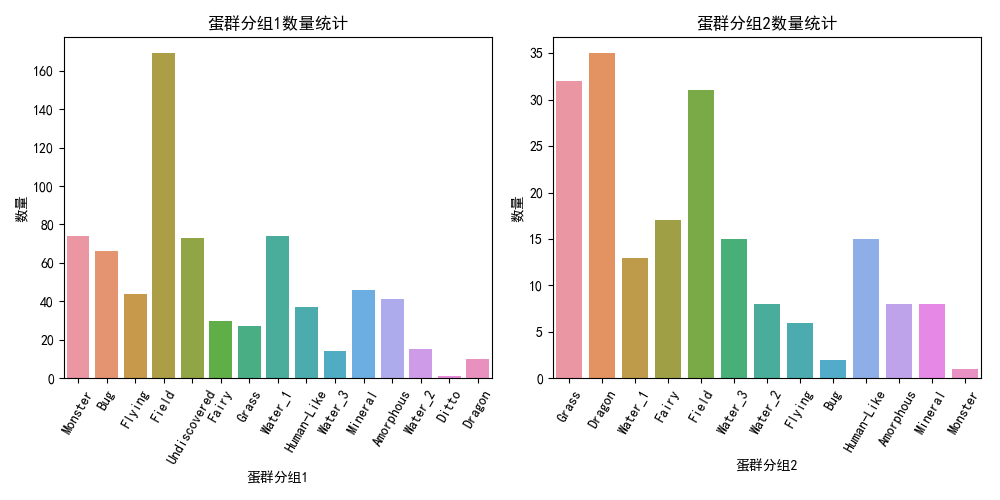

In [19]:
plt.figure(figsize=(10, 5))

# Egg_Group_1 的数量统计图
plt.subplot(1, 2, 1)
sns.countplot(x='Egg_Group_1', data = data)

plt.title('蛋群分组1数量统计')
plt.xlabel('蛋群分组1')
plt.ylabel('数量')
plt.xticks(rotation=60)

# Egg_Group_2 的数量统计图
plt.subplot(1, 2, 2)
sns.countplot(x='Egg_Group_2', data=data)

plt.title('蛋群分组2数量统计')
plt.xlabel('蛋群分组2')
plt.ylabel('数量')
plt.xticks(rotation=60)

plt.tight_layout()

<IPython.core.display.Javascript object>


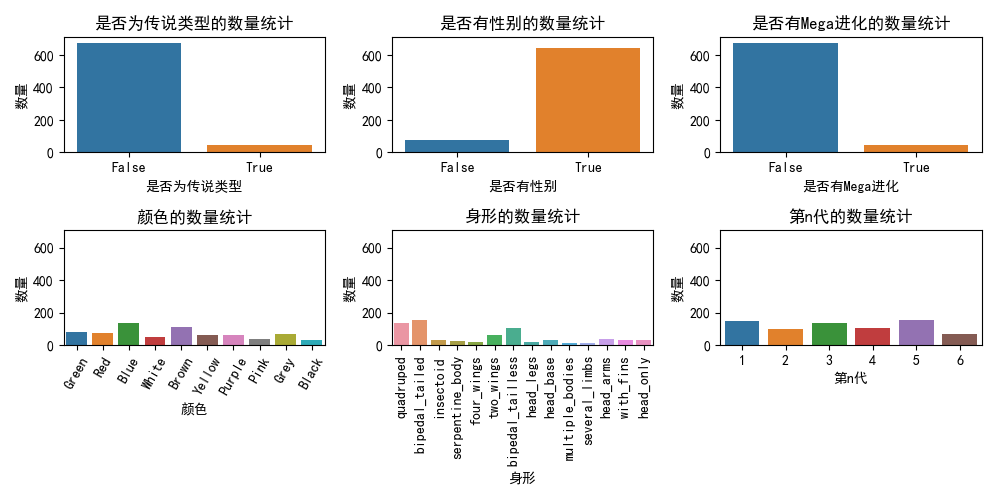

In [26]:
# 其余变量数量统计
plt.figure(figsize=(10, 5))

# isLegendary 的数量统计图
ax1 = plt.subplot(2, 3, 1)
sns.countplot(x='isLegendary', data=data)
plt.title('是否为传说类型的数量统计')
plt.xlabel('是否为传说类型')
plt.ylabel('数量')

# hasGender 的数量统计图
plt.subplot(2, 3, 2, sharey=ax1)
sns.countplot(x='hasGender',data=data)
plt.title('是否有性别的数量统计')
plt.xlabel('是否有性别')
plt.ylabel('数量')

# hasMegaEvolution 的数量统计图
plt.subplot(2, 3, 3, sharey=ax1)
sns.countplot(x='hasMegaEvolution', data=data)
plt.title('是否有Mega进化的数量统计')
plt.xlabel('是否有Mega进化')
plt.ylabel('数量')

# 颜色 的数量统计图
plt.subplot(2, 3, 4, sharey=ax1)
sns.countplot(x='Color', data=data)
plt.title('颜色的数量统计')
plt.xlabel('颜色')
plt.ylabel('数量')
plt.xticks(rotation=60)

# 身形 的数量统计图
plt.subplot(2, 3, 5, sharey=ax1)
sns.countplot(x='Body_Style', data=data)
plt.title('身形的数量统计')
plt.xlabel('身形')
plt.ylabel('数量')
plt.xticks(rotation=90)

# 第n代 的数量统计图
plt.subplot(2, 3, 6, sharey=ax1)
sns.countplot(x='Generation', data=data)
plt.title('第n代的数量统计')
plt.xlabel('第n代')
plt.ylabel('数量')

plt.tight_layout()

<IPython.core.display.Javascript object>


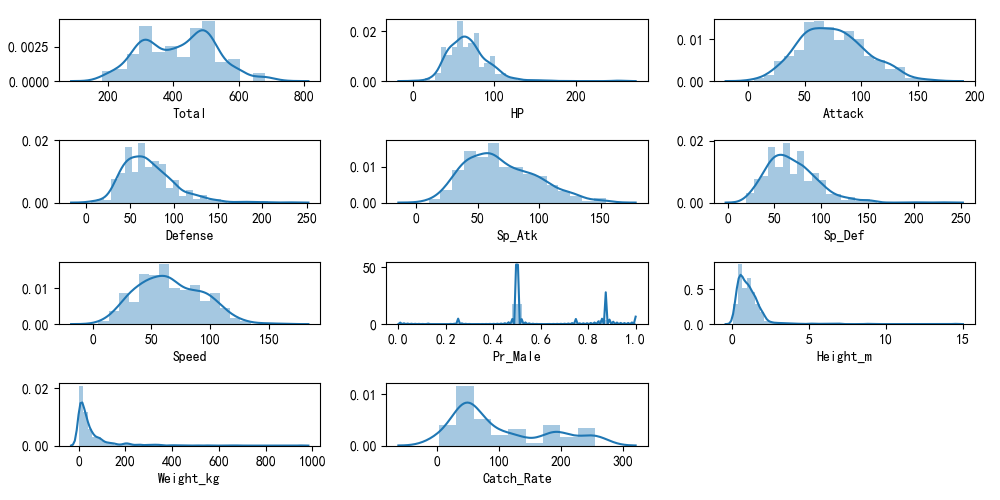

In [27]:
# 数值型数据分布统计
plt.figure(figsize=(10, 5))

numeric_cols = ['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Pr_Male', 'Height_m', 'Weight_kg', 'Catch_Rate']

for i in range(len(numeric_cols)):
    plt.subplot(4, 3, i+1)
    sns.distplot(data[numeric_cols[i]].dropna())
    plt.xlabel(numeric_cols[i])
    
plt.tight_layout()

## 变量间关系分析

<IPython.core.display.Javascript object>


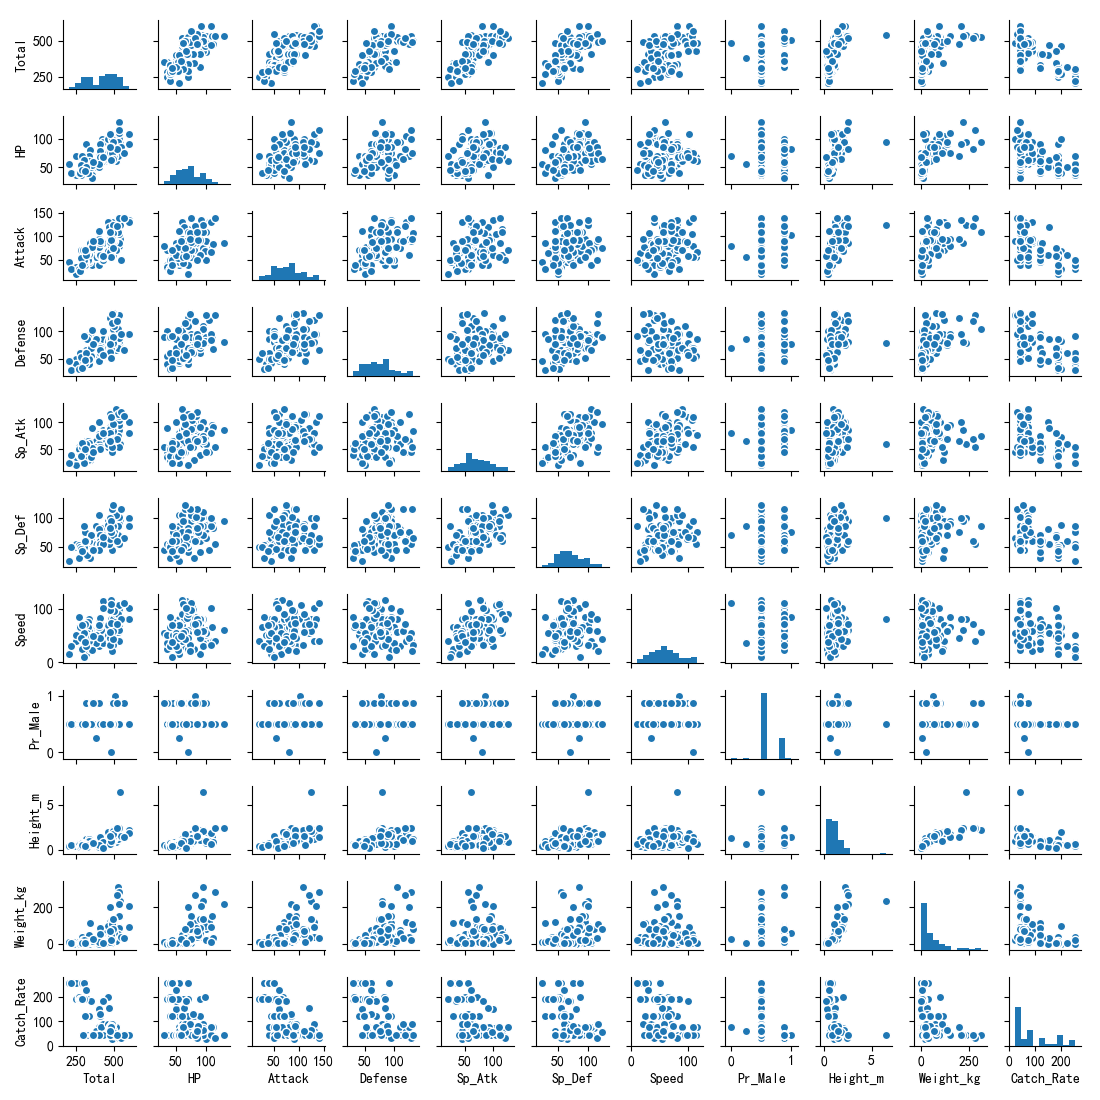

In [32]:
# plt.figure()
sns.pairplot(data.dropna(), vars=numeric_cols, size=1)

In [33]:
# 计算变量间的相关系数，观察变量间的关系
corr_df = data[numeric_cols].corr()
corr_df

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Pr_Male,Height_m,Weight_kg,Catch_Rate
Total,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.113564,0.526813,0.535966,-0.738280
HP,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,-0.066704,0.442872,0.431320,-0.478725
Attack,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.213882,0.408590,0.469395,-0.525106
Defense,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.063899,0.354205,0.476983,-0.436558
Sp_Atk,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.105893,0.330579,0.285048,-0.539114
Sp_Def,0.706501,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.017941,0.313196,0.328645,-0.513014
Speed,0.548890,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.070098,0.224617,0.108637,-0.410557
Pr_Male,0.113564,-0.066704,0.213882,0.063899,0.105893,0.017941,0.070098,1.000000,0.040863,0.061196,-0.253645
Height_m,0.526813,0.442872,0.408590,0.354205,0.330579,0.313196,0.224617,0.040863,1.000000,0.661342,-0.382862
Weight_kg,0.535966,0.431320,0.469395,0.476983,0.285048,0.328645,0.108637,0.061196,0.661342,1.000000,-0.367798


<IPython.core.display.Javascript object>


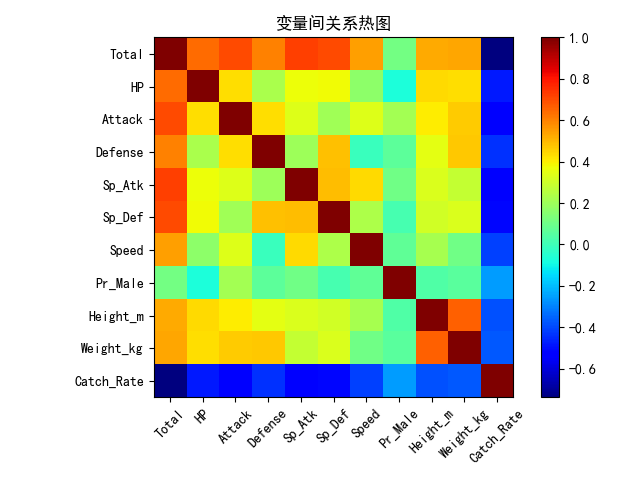

In [39]:
plt.figure()

# 关闭格子线 (grid line)
ax = plt.gca()
ax.grid(False)

plt.imshow(corr_df, cmap='jet')

plt.title('变量间关系热图')
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation='45')
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.colorbar()
plt.tight_layout()